# Data Science Salaries
In this project we will perform some statistics on data science salaries in different parts of the world from 2020 to 2022.

As always, we begin with importing the libraries.

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Loading

In [97]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Before we get started, let's view some information about the dataset. For that we will use the `info` method provided by the `pandas` `DataFrame`.

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


We then view some common summary statistics using the `describe` method.

In [99]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


## Data Cleaning

From the previous section we can observe the following:
- We have one meaningless column — `Unnamed: 0`
- The `salary` column is somewhat redundant. We can rely on the `salary_in_usd` column to compare salaries. We will keep the currency column anyways.
- There doesn't seem to be null/na values with the dataset.

### Removing Unnecessary Columns

In [100]:
df.drop(columns=['Unnamed: 0', 'salary'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,USD,150000,US,50,US,L


### Handling Duplicates

In [101]:
print(f'Duplicates before: {df.duplicated().sum()}')
df.drop_duplicates(inplace=True)
print(f'Duplicates after: {df.duplicated().sum()}') # Making sure the duplicates were removed

Duplicates before: 42
Duplicates after: 0


### Handling Missing Data

There likely isn't any missing data. We will do a quick check to further assure that.

In [102]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [103]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### Handling Outliers

Numeric columns:
- salary_in_usd
- work_year
- remote_ratio

We will examine each of these columns and decide whether an action must be taken towards the outliers.

In [104]:
def view_percentages(df, col):
  total = df[col].count()
  for val in df[col].unique():
    cnt = df[col][df[col] == val].count()
    print(f'{val} records percentage: {cnt/total*100:.2f}%')

In [105]:
view_percentages(df, 'work_year')

2020 records percentage: 12.74%
2021 records percentage: 38.05%
2022 records percentage: 49.20%


In [106]:
view_percentages(df, 'remote_ratio')

0 records percentage: 21.42%
50 records percentage: 17.35%
100 records percentage: 61.24%


count       565.000000
mean     110610.343363
std       72280.702792
min        2859.000000
25%       60757.000000
50%      100000.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64


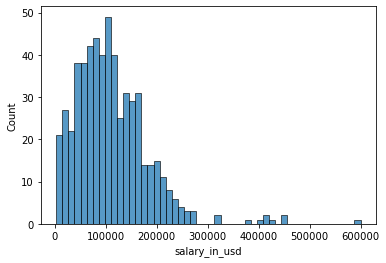

In [108]:
print(df['salary_in_usd'].describe())
plt.figure(figsize=(6, 4))
g = sns.histplot(data=df, x='salary_in_usd', bins=50)

In [109]:
print(df['salary_in_usd'][df['salary_in_usd'] > 500000].count())
print(df['salary_in_usd'][df['salary_in_usd'] > 400000].count())
print(df['salary_in_usd'][df['salary_in_usd'] > 350000].count())
print(df['salary_in_usd'][df['salary_in_usd'] > 300000].count())

1
7
8
10


There are only 10 records with salaries above 300,000 USD. That said, we can safely consider these records to be outliers and remove them.

count       555.000000
mean     105062.781982
std       58981.192674
min        2859.000000
25%       60000.000000
50%      100000.000000
75%      145500.000000
max      276000.000000
Name: salary_in_usd, dtype: float64


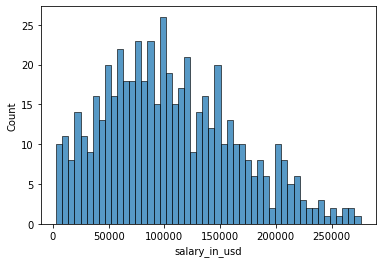

In [110]:
df = df[df['salary_in_usd'] < 300000]
print(df['salary_in_usd'].describe())
plt.figure(figsize=(6, 4))
g = sns.histplot(data=df, x='salary_in_usd', bins=50)

#### Final Check After Cleaning

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 0 to 606
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           555 non-null    int64 
 1   experience_level    555 non-null    object
 2   employment_type     555 non-null    object
 3   job_title           555 non-null    object
 4   salary_currency     555 non-null    object
 5   salary_in_usd       555 non-null    int64 
 6   employee_residence  555 non-null    object
 7   remote_ratio        555 non-null    int64 
 8   company_location    555 non-null    object
 9   company_size        555 non-null    object
dtypes: int64(3), object(7)
memory usage: 63.9+ KB


In [112]:
df.describe()

,work_year,salary_in_usd,remote_ratio
count,555.000000,555.000000,555.000000
mean,2021.371171,105062.781982,69.639640
std,0.694926,58981.192674,40.992381
min,2020.000000,2859.000000,0.000000
25%,2021.000000,60000.000000,50.000000
50%,2021.000000,100000.000000,100.000000
75%,2022.000000,145500.000000,100.000000
max,2022.000000,276000.000000,100.000000


In [113]:
view_percentages(df, 'work_year')

2020 records percentage: 12.43%
2021 records percentage: 38.02%
2022 records percentage: 49.55%


In [114]:
view_percentages(df, 'remote_ratio')

0 records percentage: 21.62%
50 records percentage: 17.48%
100 records percentage: 60.90%


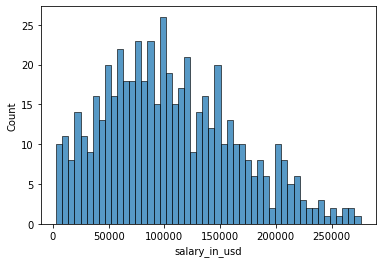

In [115]:
df = df[df['salary_in_usd'] < 300000]
plt.figure(figsize=(6, 4))
g = sns.histplot(data=df, x='salary_in_usd', bins=50)